## Reading the Data

In [1]:
# import pandas module and read the data
import numpy as np
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Big Data and AI/HWs/HW1_house_price_regression.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Bedroom,Kitchen,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,...,Y,

## Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


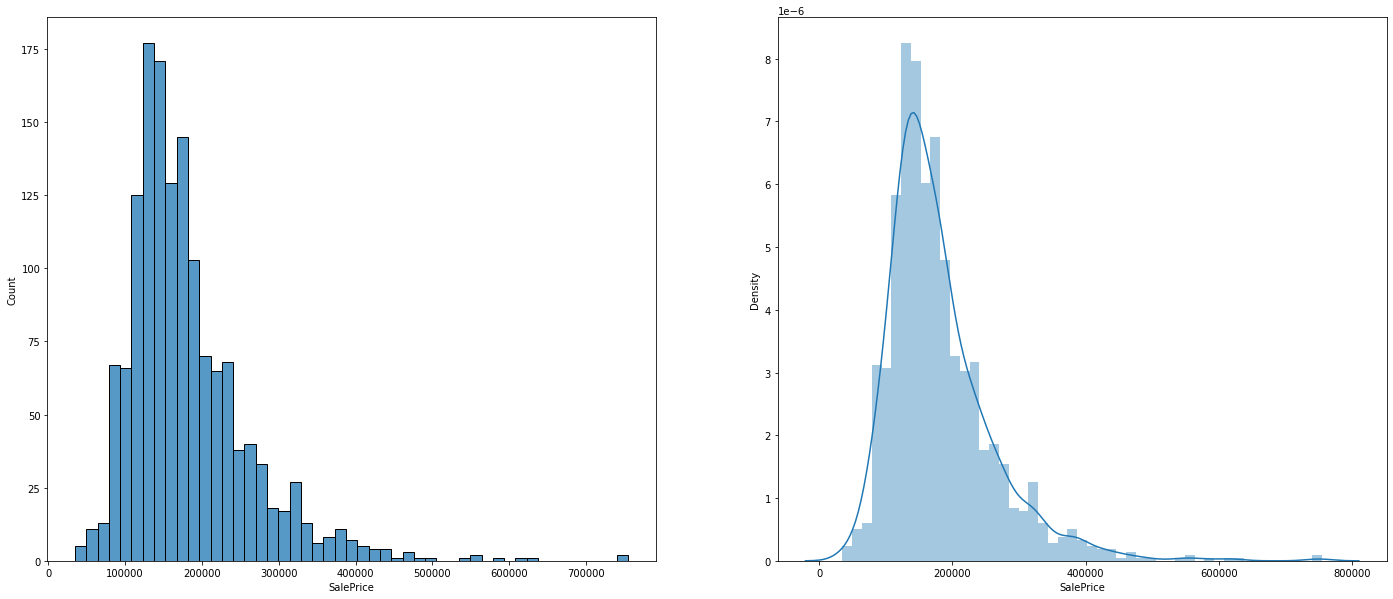

In [2]:
# display histogram on SalePrice using MatPlotLib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(24,10))
plt.subplot(121)
sn.histplot(df.SalePrice)
plt.subplot(122)
sn.distplot(df.SalePrice)

## Preprocessing the Data

In [3]:
# removing the Id column
df = df.drop(['Id'], axis=1)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Bedroom,Kitchen,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ

In [4]:
# check for missing values in columns
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

In [5]:
# report data types of columns
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [6]:
# selecting the categorical variables
categorical_cols = df.select_dtypes('object').columns.to_list()

In [7]:
# converting the following columns to string as they are factored categorical variables loaded as int64 data type
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype(str)

In [8]:
# selecting the numerical variables
numerical_cols = df.select_dtypes(include=['number']).columns.to_list()

In [9]:
# filling NaN values
df['MasVnrType'] = df['MasVnrType'].fillna("None")
df['Electrical'] = df['Electrical'].fillna("Mix")
for i in categorical_cols:
  df[i] = df[i].fillna("NA")
for i in numerical_cols:
  df[i] = df[i].fillna(value=df[i].mean())

In [10]:
# normalizing values in all the numerical columns
from sklearn import preprocessing
df[numerical_cols] = preprocessing.normalize(df[numerical_cols])

In [11]:
df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Bedroom,Kitchen,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.000435,0.061811,0.012706,0.012810,0.000501,0.002463,0.000291,0.003437,0.006191,0.006967,0.001913,0.000043,0.008923,0.000002,3.611792e-07,0.000009,0.000002,0.000018,0.000007,0.000040,0.000003,0.012770,0.000010,0.002712,0.000506,0.000254,0.000167,0.000018,0.000080,0.000012,0.000306,0.000041,0.012989,0.996760
std,0.000195,0.039513,0.005241,0.005326,0.000857,0.002424,0.000992,0.002806,0.002446,0.002395,0.002387,0.000372,0.002810,0.000003,1.553643e-06,0.000003,0.000003,0.000008,0.000004,0.000015,0.000004,0.005329,0.000004,0.001245,0.000709,0.000525,0.000478,0.000157,0.000297,0.000182,0.003474,0.000025,0.005491,0.008082
min,0.000087,0.010477,0.002640,0.002641,0.000000,0.000000,0.000000,0.000000,0.000000,0.002491,0.000000,0.000000,0.003619,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000013,0.000000,0.002640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000001,0.002657,0.811708
25%,0.000311,0.042023,0.009330,0.009342,0.000000,0.000000,0.000000,0.001255,0.004571,0.005326,0.000000,0.000000,0.007185,0.000000,0.000000e+00,0.000007,0.000000,0.000013,0.000005,0.000031,0.000000,0.009330,0.000008,0.002122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000024,0.009376,0.996779
50%,0.000410,0.055884,0.012038,0.012157,0.000000,0.002407,0.000000,0.002930,0.006221,0.006774,0.000000,0.000000,0.008305,0.000000,0.000000e+00,0.000009,0.000000,0.000017,0.000006,0.000038,0.000003,0.012100,0.000010,0.002597,0.000000,0.000125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000036,0.012259,0.997970
75%,0.000520,0.072356,0.015056,0.015184,0.000819,0.004051,0.000000,0.005114,0.007456,0.008034,0.004093,0.000000,0.009967,0.000005,0.000000e+00,0.000011,0.000005,0.000022,0.000008,0.000045,0.000006,0.015109,0.000012,0.003238,0.000817,0.000339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000050,0.015418,0.998813
max,0.002896,0.583778,0.053299,0.054132,0.006740,0.032681,0.007220,0.020938,0.035379,0.027169,0.016244,0.005997,0.032670,0.000027,1.563449e-05,0.000036,0.000018,0.000073,0.000036,0.000155,0.000020,0.054923,0.000036,0.015018,0.004976,0.014518,0.004183,0.002807,0.002401,0.003573,0.101382,0.000305,0.055770,0.999812


In [12]:
# creating dummy variables for the non-factored categorical variables
df = pd.get_dummies(df, columns=categorical_cols)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Bedroom,Kitchen,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,0.000311,0.040484,7,5,0.009596,0.009596,0.000939,0.003382,0.000000,0.000719,0.004101,0.004101,0.004092,0.0,0.008193,0.000005,0.000000,0.000010,0.000005,0.000014,0.000005,0.000038,0.000000,0.009596,0.000010,0.002625,0.000000,0.000292,0.000000,0.0,0.0,0.0,0.000000,0.000010,0.009620,0.998927,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,0.000440,0.052801,6,8,0.010868,0.010868,0.000000,0.005379,0.000000,0.001562,0.006941,0.006941,0.000000,0.0,0.006941,0.000000,0.000006,0.000011,0.000000,0.000017,0.000006,0.000033,0.000006,0.010868,0.000011,0.002530,0.001639,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000028,0.011039,0.998274,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,0.000304,0.050261,7,5,0.008940,0.008944,0.000724,0.002171,0.000000,0.001939,0.004110,0.004110,0.003869,0.0,0.007979,0.000004,0.000000,0.000009,0.000004,0.000013,0.000004,0.000027,0.000004,0.008940,0.000009,0.002716,0.000000,0.000188,0.000000,0.0,0.0,0.0,0.000000,0.000040,0.008971,0.998511,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,0.000427,0.068019,7,5,0.013639,0.014031,0.000000,0.001538,0.000000,0.003846,0.005385,0.006845,0.005385,0.0,0.012229,0.000007,0.000000,0.000007,0.000000,0.000021,0.000007,0.000050,0.000007,0.014231,0.000021,0.004573,0.000000,0.000249,0.001937,0.0,0.0,0.0,0.000000,0.000014,0.014288,0.997140,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,0.000335,0.056936,8,5,0.007985,0.007985,0.001397,0.002615,0.000000,0.001956,0.004572,0.004572,0.004204,0.0,0.008776,0.000004,0.000000,0.000008,0.000004,0.000016,0.000004,0.000036,0.000004,0.007985,0.000012,0.003338,0.000767,0.000335,0.000000,0.0,0.0,0.0,0.000000,0.000048,0.008017,0.998169,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0.000354,0.045177,6,5,0.011407,0.011413,0.000000,0.000000,0.000000,0.005438,0.005438,0.005438,0.003960,0.0,0.009398,0.000000,0.000000,0.000011,0.000006,0.000017,0.000006,0.000040,0.000006,0.011407,0.000011,0.002625,0.000000,0.000228,0.000000,0.0,0.0,0.0,0.000000,0.000046,0.011453,0.998618,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,20,0.000404,0.062595,6,6,0.009398,0.009445,0.000565,0.003753,0.000774,0.002798,0.007326,0.009849,0.000000,0.0,0.009849,0.000005,0.000000,0.000010,0.000000,0.000014,0.000005,0.000033,0.000010,0.009398,0.000010,0.002376,0.001658,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000010,0.009550,0.997720,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0

In [13]:
# separating feature columns and target column
target_col = df['SalePrice']
feature_cols = df.drop(['SalePrice'], axis=1)

## Create training and validation data sets

In [14]:
print("Before:\nData = %s\nTarget = %s" % (feature_cols.shape, target_col.shape))
from sklearn.model_selection import train_test_split
# split the data and target into training and validation sets
data_train, data_valid, target_train, target_valid = train_test_split(feature_cols, target_col, test_size=0.25, random_state=30)
# verify sizes
print("After:\nTraining Data = %s\nValidation Data = %s" % (data_train.shape, data_valid.shape))
print("Training Target = %s\nValidation Target = %s" % (target_train.shape, target_valid.shape))

Before:
Data = (1460, 302)
Target = (1460,)
After:
Training Data = (1095, 302)
Validation Data = (365, 302)
Training Target = (1095,)
Validation Target = (365,)


## Multiple Linear Regression - ML Modeling

In [15]:
from sklearn.linear_model import LinearRegression
# create mlr model
mlr = LinearRegression()
# fit the training data
mlr.fit(data_train, target_train)

LinearRegression()

In [16]:
# print Variables, Coefficients, Intercept and R2 values
print("Variables = %s" % data_train.columns.tolist())
print("Coefficients = %s" % mlr.coef_)
print("Intercept = %f" % mlr.intercept_)
print("R2 for training = %.5f" % mlr.score(data_train, target_train))
print("R2 for validation = %.5f" % mlr.score(data_valid, target_valid))

Variables = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_NA', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn

In [17]:
# print result of RMSE values for training and validation data sets
from sklearn import metrics
target_train_pred = mlr.predict(data_train)
target_pred = mlr.predict(data_valid)
print("RMSE for training = %.5f" % np.sqrt(metrics.mean_squared_error(target_train, target_train_pred)))
print("RMSE for validation = %.5f" % np.sqrt(metrics.mean_squared_error(target_valid, target_pred)))

RMSE for training = 0.00233
RMSE for validation = 0.00410
